<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/ML_Exercises_v2Sonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

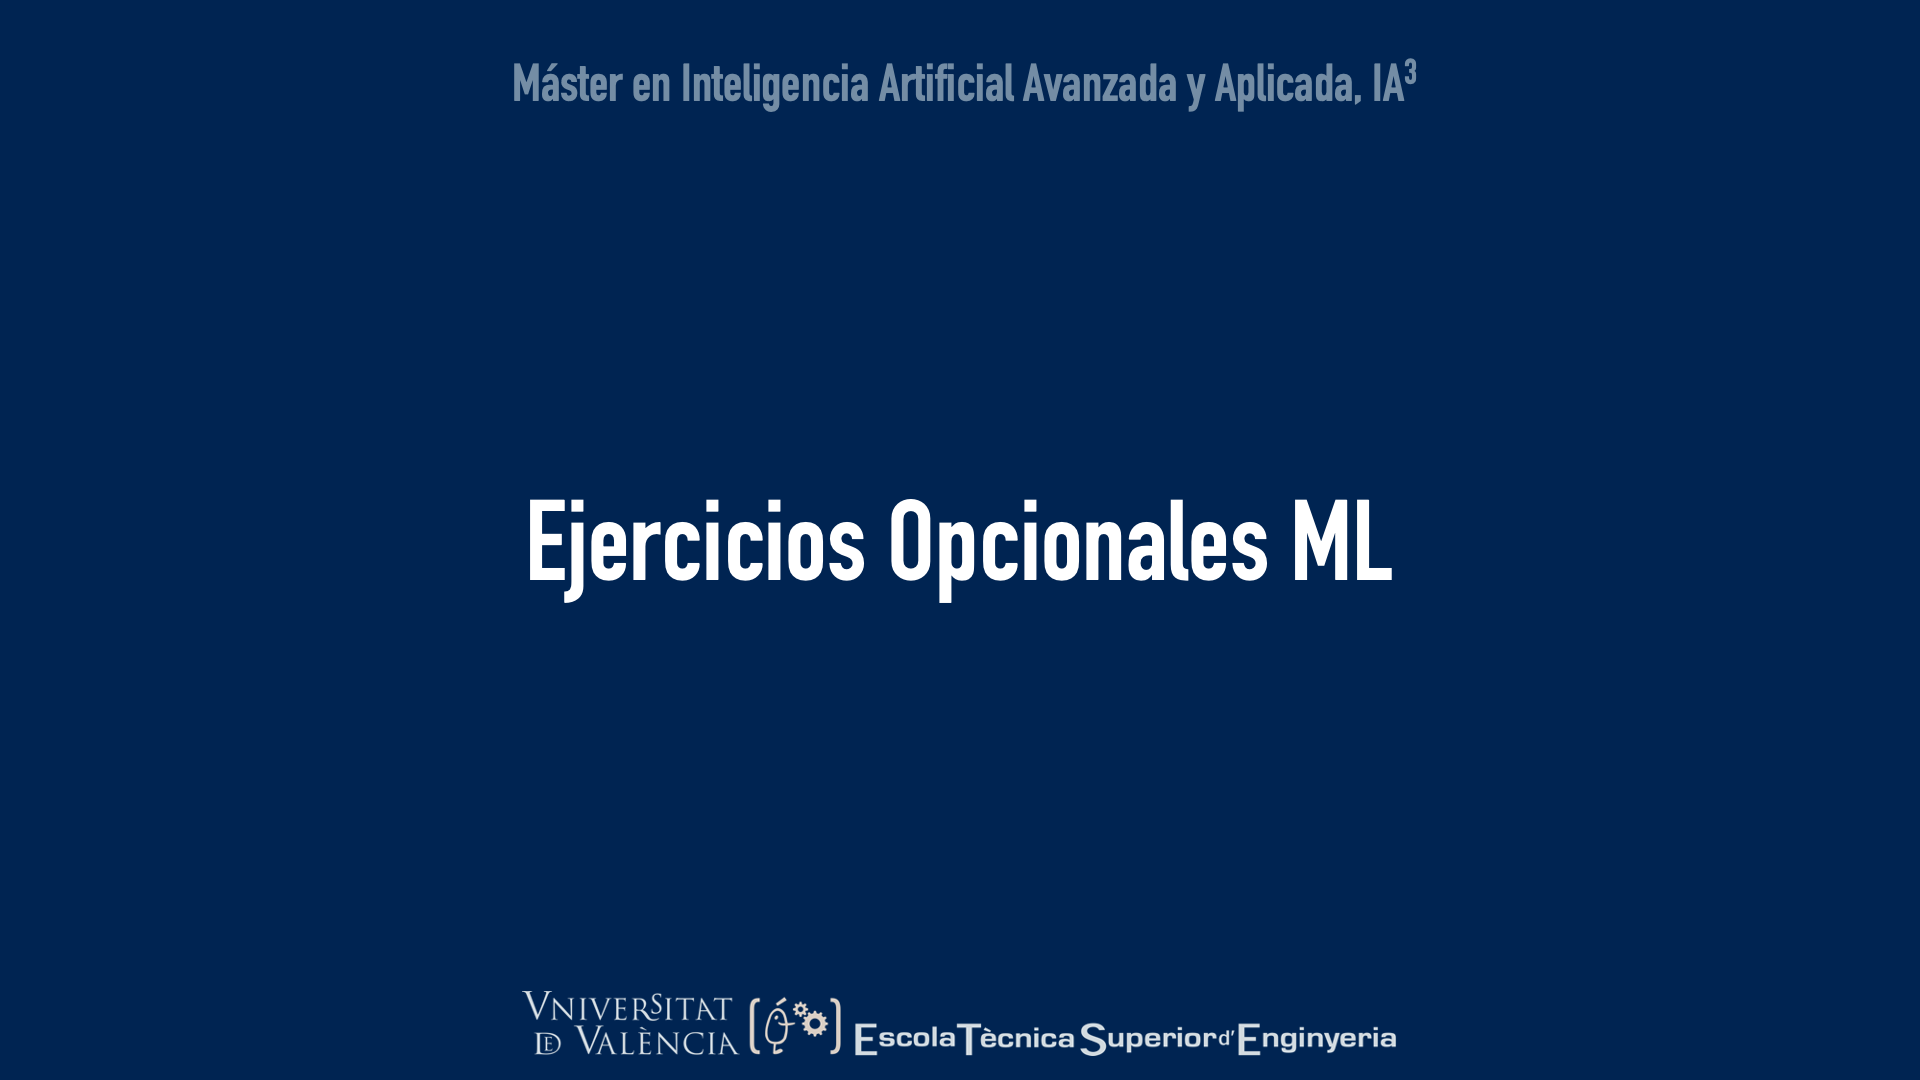

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

MI DIAGRAMA:
https://drive.google.com/file/d/18ZF7qmVxlL5JidzdCmJxGgWvmv9n8udq/view?usp=sharing

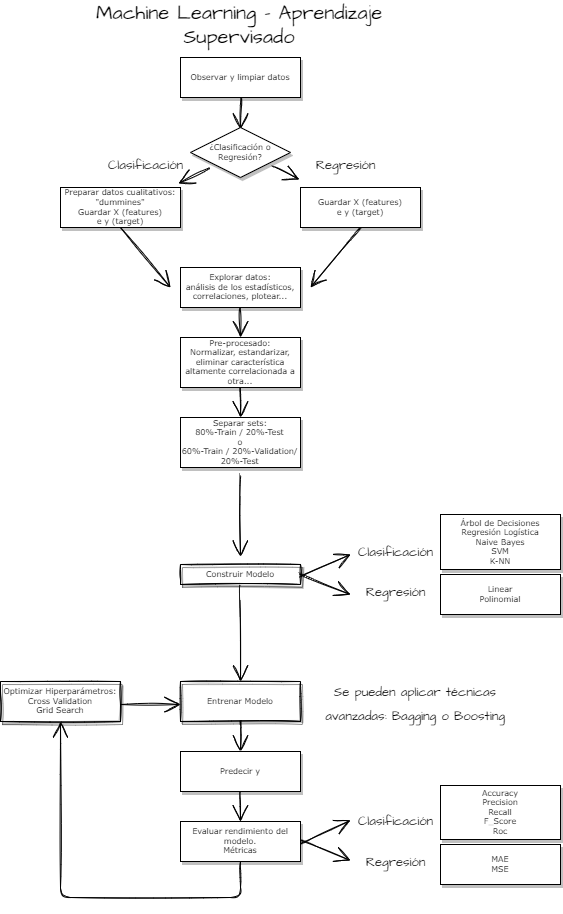

# Exercise 02:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [114]:
import seaborn as sns
import pandas as pd
import plotly.express as px
from math import log

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.express as px

from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import random 
random.seed(123)

In [115]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [116]:
dummies = pd.get_dummies(dataset.loc[:, ['species', 'island']])
numeric = dataset.select_dtypes('number')

X = pd.concat([dummies, numeric], axis=1)
Y = dataset.iloc[:,-1:]

X.shape, Y.shape

((333, 10), (333, 1))

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# LogisticRegression



In [123]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [124]:
model.classes_

array(['Female', 'Male'], dtype=object)

In [125]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.8514056224899599
0.8095238095238095


No parece que tengamos Overfitting pero el score no es muy elevado.

In [126]:
print("Accuracy Score:",accuracy_score(Y_test, model.predict(X_test)))
print("Precision Score:",precision_score(Y_test,model.predict(X_test), average=None, labels=['Female','Male']))
print("Recall Score:",recall_score(Y_test,model.predict(X_test), average=None, labels=['Female','Male']))
print("f1 score:",f1_score(Y_test,model.predict(X_test), average=None, labels=['Female','Male']))

Accuracy Score: 0.8095238095238095
Precision Score: [0.80952381 0.80952381]
Recall Score: [0.80952381 0.80952381]
f1 score: [0.80952381 0.80952381]


In [127]:
#Transform into probabilities
new_probs = []
for value in Y_test['sex']:
  if value == "Male":
    new_probs.append(1.0)
  else:
    new_probs.append(0.0)

#Transform into probabilities
new_probs_fm = []
for value in Y_test['sex']:
  if value == "Female":
    new_probs_fm.append(1.0)
  else:
    new_probs_fm.append(0.0)

In [128]:
#male
fpr, tpr, thresholds = roc_curve(new_probs, list(model.predict_proba(X_test)[:,1]), drop_intermediate=False)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

In [129]:
#female
fpr_fm, tpr_fm, thresholds_fm = roc_curve(new_probs_fm, list(model.predict_proba(X_test)[:,0]), drop_intermediate=False)
df_roc_fm = pd.DataFrame({'fpr':fpr_fm, 'tpr':tpr_fm, 'threshold':thresholds_fm})

In [130]:
df_roc

,fpr,tpr,threshold
0,0.000000,0.000000,1.998741
1,0.000000,0.023810,0.998741
2,0.000000,0.047619,0.996377
3,0.000000,0.071429,0.995976
4,0.000000,0.095238,0.995647
...,...,...,...
80,0.904762,1.000000,0.008332
81,0.928571,1.000000,0.008021
82,0.952381,1.000000,0.007814
83,0.976190,1.000000,0.005678


In [131]:
df_roc_fm

,fpr,tpr,threshold
0,0.000000,0.000000,1.996692
1,0.000000,0.023810,0.996692
2,0.000000,0.047619,0.994322
3,0.000000,0.071429,0.992186
4,0.000000,0.095238,0.991979
...,...,...,...
80,0.904762,1.000000,0.011780
81,0.928571,1.000000,0.004353
82,0.952381,1.000000,0.004024
83,0.976190,1.000000,0.003623


In [132]:
#male
fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

In [133]:
#male
roc_auc_score(new_probs, list(model.predict_proba(X_test)[:,1]))

0.9087301587301586

In [134]:
#female
fig = px.line(df_roc_fm, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

In [135]:
roc_auc_score(new_probs_fm, list(model.predict_proba(X_test)[:,0]))

0.9087301587301587

En la curva ROC que obtenemos un área próxima bastante gran pero no lleva a 1. Por lo que observando los scores y la curva ROC deberíamos mejorar el modelo.

# BaggingClasifier-LogisticRegression


Aplicamos Bagging al LogisticRegression para evaluar diferentes algoritmos en paralelo y determinar el mejor de todos.

In [136]:
from sklearn.ensemble import BaggingClassifier

base_estimator = LogisticRegression(max_iter=300)
model = BaggingClassifier(base_estimator, n_estimators=12, max_samples=10, max_features=7)

In [137]:
model.fit(X_train, Y_train.values.ravel())
print("Bagging score:",model.score(X_test, Y_test.values.ravel()))
base_estimator.fit(X_train, Y_train.values.ravel())
print("Logistic score:",base_estimator.score(X_test, Y_test.values.ravel()))

Bagging score: 0.8333333333333334
Logistic score: 0.8095238095238095


Con Bagging en este caso no hemos conseguido mejorar el modelo. Deberemos afinar nuestros hiperparámetros de otra manera.

# LogisticRegression: Ajuste de Hiperparámetros

Aplicamos GridSearchCV que nos permite realizar una validación cruzada de parámetros y evaluar el rendimiento del modelo para seleccionar los mejores **hiperparámetros**.

¡¡¡¡¡¡¡¡¡¡¡¡
 COMENTAR QUE HYPERPARÁMETROS Y POR QUÉ? 
 !!!!!!!!!!!!  

In [138]:
import numpy as np

In [139]:
logModel = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000]
    }
]

Note: The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
CV = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
log_CV = CV.fit(X_train,Y_train.values.ravel())

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


In [160]:
log_CV.best_estimator_

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

In [163]:
log2 = LogisticRegression(max_iter=100, C=0.0001, penalty='none', solver='newton-cg')

log2.fit(X_train, Y_train.values.ravel())
#print("Logistic CV score:",log2.score(X_test, Y_test.values.ravel()))
print("Logistic CV score:")
print("Train:", log2.score(X_train, Y_train.values.ravel()))
print("Test:", log2.score(X_test , Y_test.values.ravel()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge



Logistic CV score:
Train: 0.9236947791164659
Test: 0.9523809523809523


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sc

Como podemos ver en test tenemos mayor score que en test por lo que parece que tenemos un modelo sesgado.

In [150]:
print("Accuracy Score:",accuracy_score(Y_test, log2.predict(X_test)))
print("Precision Score:",precision_score(Y_test,log2.predict(X_test), average=None, labels=['Female','Male']))
print("Recall Score:",recall_score(Y_test,log2.predict(X_test), average=None, labels=['Female','Male']))
print("f1 score:",f1_score(Y_test,log2.predict(X_test), average=None, labels=['Female','Male']))


Accuracy Score: 0.9404761904761905
Precision Score: [0.95121951 0.93023256]
Recall Score: [0.92857143 0.95238095]
f1 score: [0.93975904 0.94117647]


In [151]:
#Transform into probabilities
new_probs = []
for value in Y_test['sex']:
  if value == "Male":
    new_probs.append(1.0)
  else:
    new_probs.append(0.0)

#Transform into probabilities
new_probs_fm = []
for value in Y_test['sex']:
  if value == "Female":
    new_probs_fm.append(1.0)
  else:
    new_probs_fm.append(0.0)

In [152]:
#male
fpr, tpr, thresholds = roc_curve(new_probs, list(model.predict_proba(X_test)[:,1]), drop_intermediate=False)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})
#female
fpr_fm, tpr_fm, thresholds_fm = roc_curve(new_probs_fm, list(model.predict_proba(X_test)[:,0]), drop_intermediate=False)
df_roc_fm = pd.DataFrame({'fpr':fpr_fm, 'tpr':tpr_fm, 'threshold':thresholds_fm})

In [153]:
#male
print(roc_auc_score(new_probs, list(model.predict_proba(X_test)[:,1])))
fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

0.9251700680272109


In [154]:
#female
print(roc_auc_score(new_probs_fm, list(model.predict_proba(X_test)[:,0])))
fig = px.line(df_roc_fm, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

0.9251700680272108


# Modelo Clase

In [155]:
#Modelo clase: DecisionTree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=22, min_samples_split=9) #definir modelo
model.fit(X_train, Y_train) #entrene modelo

DecisionTreeClassifier(criterion='entropy', max_depth=22, min_samples_split=9)

In [156]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.9518072289156626
0.9047619047619048


Vemos que en el modelo que realizamos en clase, DecisionTree, presenta mejores scores que el LogisticRegresion inicial, pero al tener un valor tan diferente en train y en test puede que tenga overfitting. En cambio, con regresión logistica no conseguiamos scores tan altos pero el modelo no parecía sobreajustar. Con el modelo Bagging en este caso no hemos mejorado el modelo LogisticRegression.

Ajustando los hiperparámetros conseguimos scores muy buenos. 

# Conclusiones